In [1]:
library(tidyverse)
library(cowplot)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2          ✔ readr     2.1.4     
✔ forcats   1.0.0.9000     ✔ stringr   1.5.1     
✔ ggplot2   3.4.4          ✔ tibble    3.2.1     
✔ lubridate 1.9.2          ✔ tidyr     1.3.0     
✔ purrr     1.0.2          
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




In [2]:
# Define column types
column_types <- cols(
  group = col_double(),
  group_name = col_logical(),  # NA suggests this might be a logical or character type
  seqnames = col_character(),
  start = col_double(),
  end = col_double(),
  width = col_double(),
  strand = col_character(),
  score = col_character(),     # 'broadly_accessible' suggests a character type
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),        # Contains a mixture of characters and numbers
  locus = col_character(),
  species_other = col_character(),
  loci = col_character(),
  gene_family = col_character(),
  number = col_double(),
  acr_id = col_character(),
  X10 = col_logical(),         # NA suggests this might be a logical or character type
  species = col_character(),
  geneID = col_character(),
  enzyme_location = col_character(),
  conserved_regions = col_character(),
  TF_ID = col_character(),
  total_width = col_double(),
  acr_class_type = col_character()
)

# List of file paths
file_paths <- c("/home/jpm73279/genome_downloads/C4_markers/count_motifs/Os.counted_motifs.tsv",
                "/home/jpm73279/genome_downloads/C4_markers/count_motifs/Pm.counted_motifs.tsv",
                "/home/jpm73279/genome_downloads/C4_markers/count_motifs/Sb.counted_motifs.tsv",
                "/home/jpm73279/genome_downloads/C4_markers/count_motifs/Uf.counted_motifs.tsv",
                "/home/jpm73279/genome_downloads/C4_markers/count_motifs/Zm.counted_motifs.tsv")

# Read and combine the files
combined_data <- map_df(file_paths, ~read_tsv(.x, col_types = column_types), .id = "source_file")


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


In [9]:
colnames(combined_data)

[1] "source_file"       "group"             "group_name"       
 [4] "seqnames"          "start"             "end"              
 [7] "width"             "strand"            "score"            
[10] "X1"                "X2"                "X3"               
[13] "X4"                "locus"             "species_other"    
[16] "loci"              "gene_family"       "number"           
[19] "acr_id"            "X10"               "species"          
[22] "geneID"            "enzyme_location"   "conserved_regions"
[25] "TF_ID"             "total_width"       "acr_class_type"

In [10]:
plotting_data <- combined_data %>% 
    dplyr::group_by(species, TF_ID, acr_class_type, conserved_regions,  total_width, gene_family) %>% 
    distinct() %>% 
    summarise(TF_counts = n()) %>% 
    dplyr::mutate(motifs_per_bp = TF_counts/total_width)

`summarise()` has grouped output by 'species', 'TF_ID', 'acr_class_type',
'conserved_regions', 'total_width'. You can override using the `.groups`
argument.


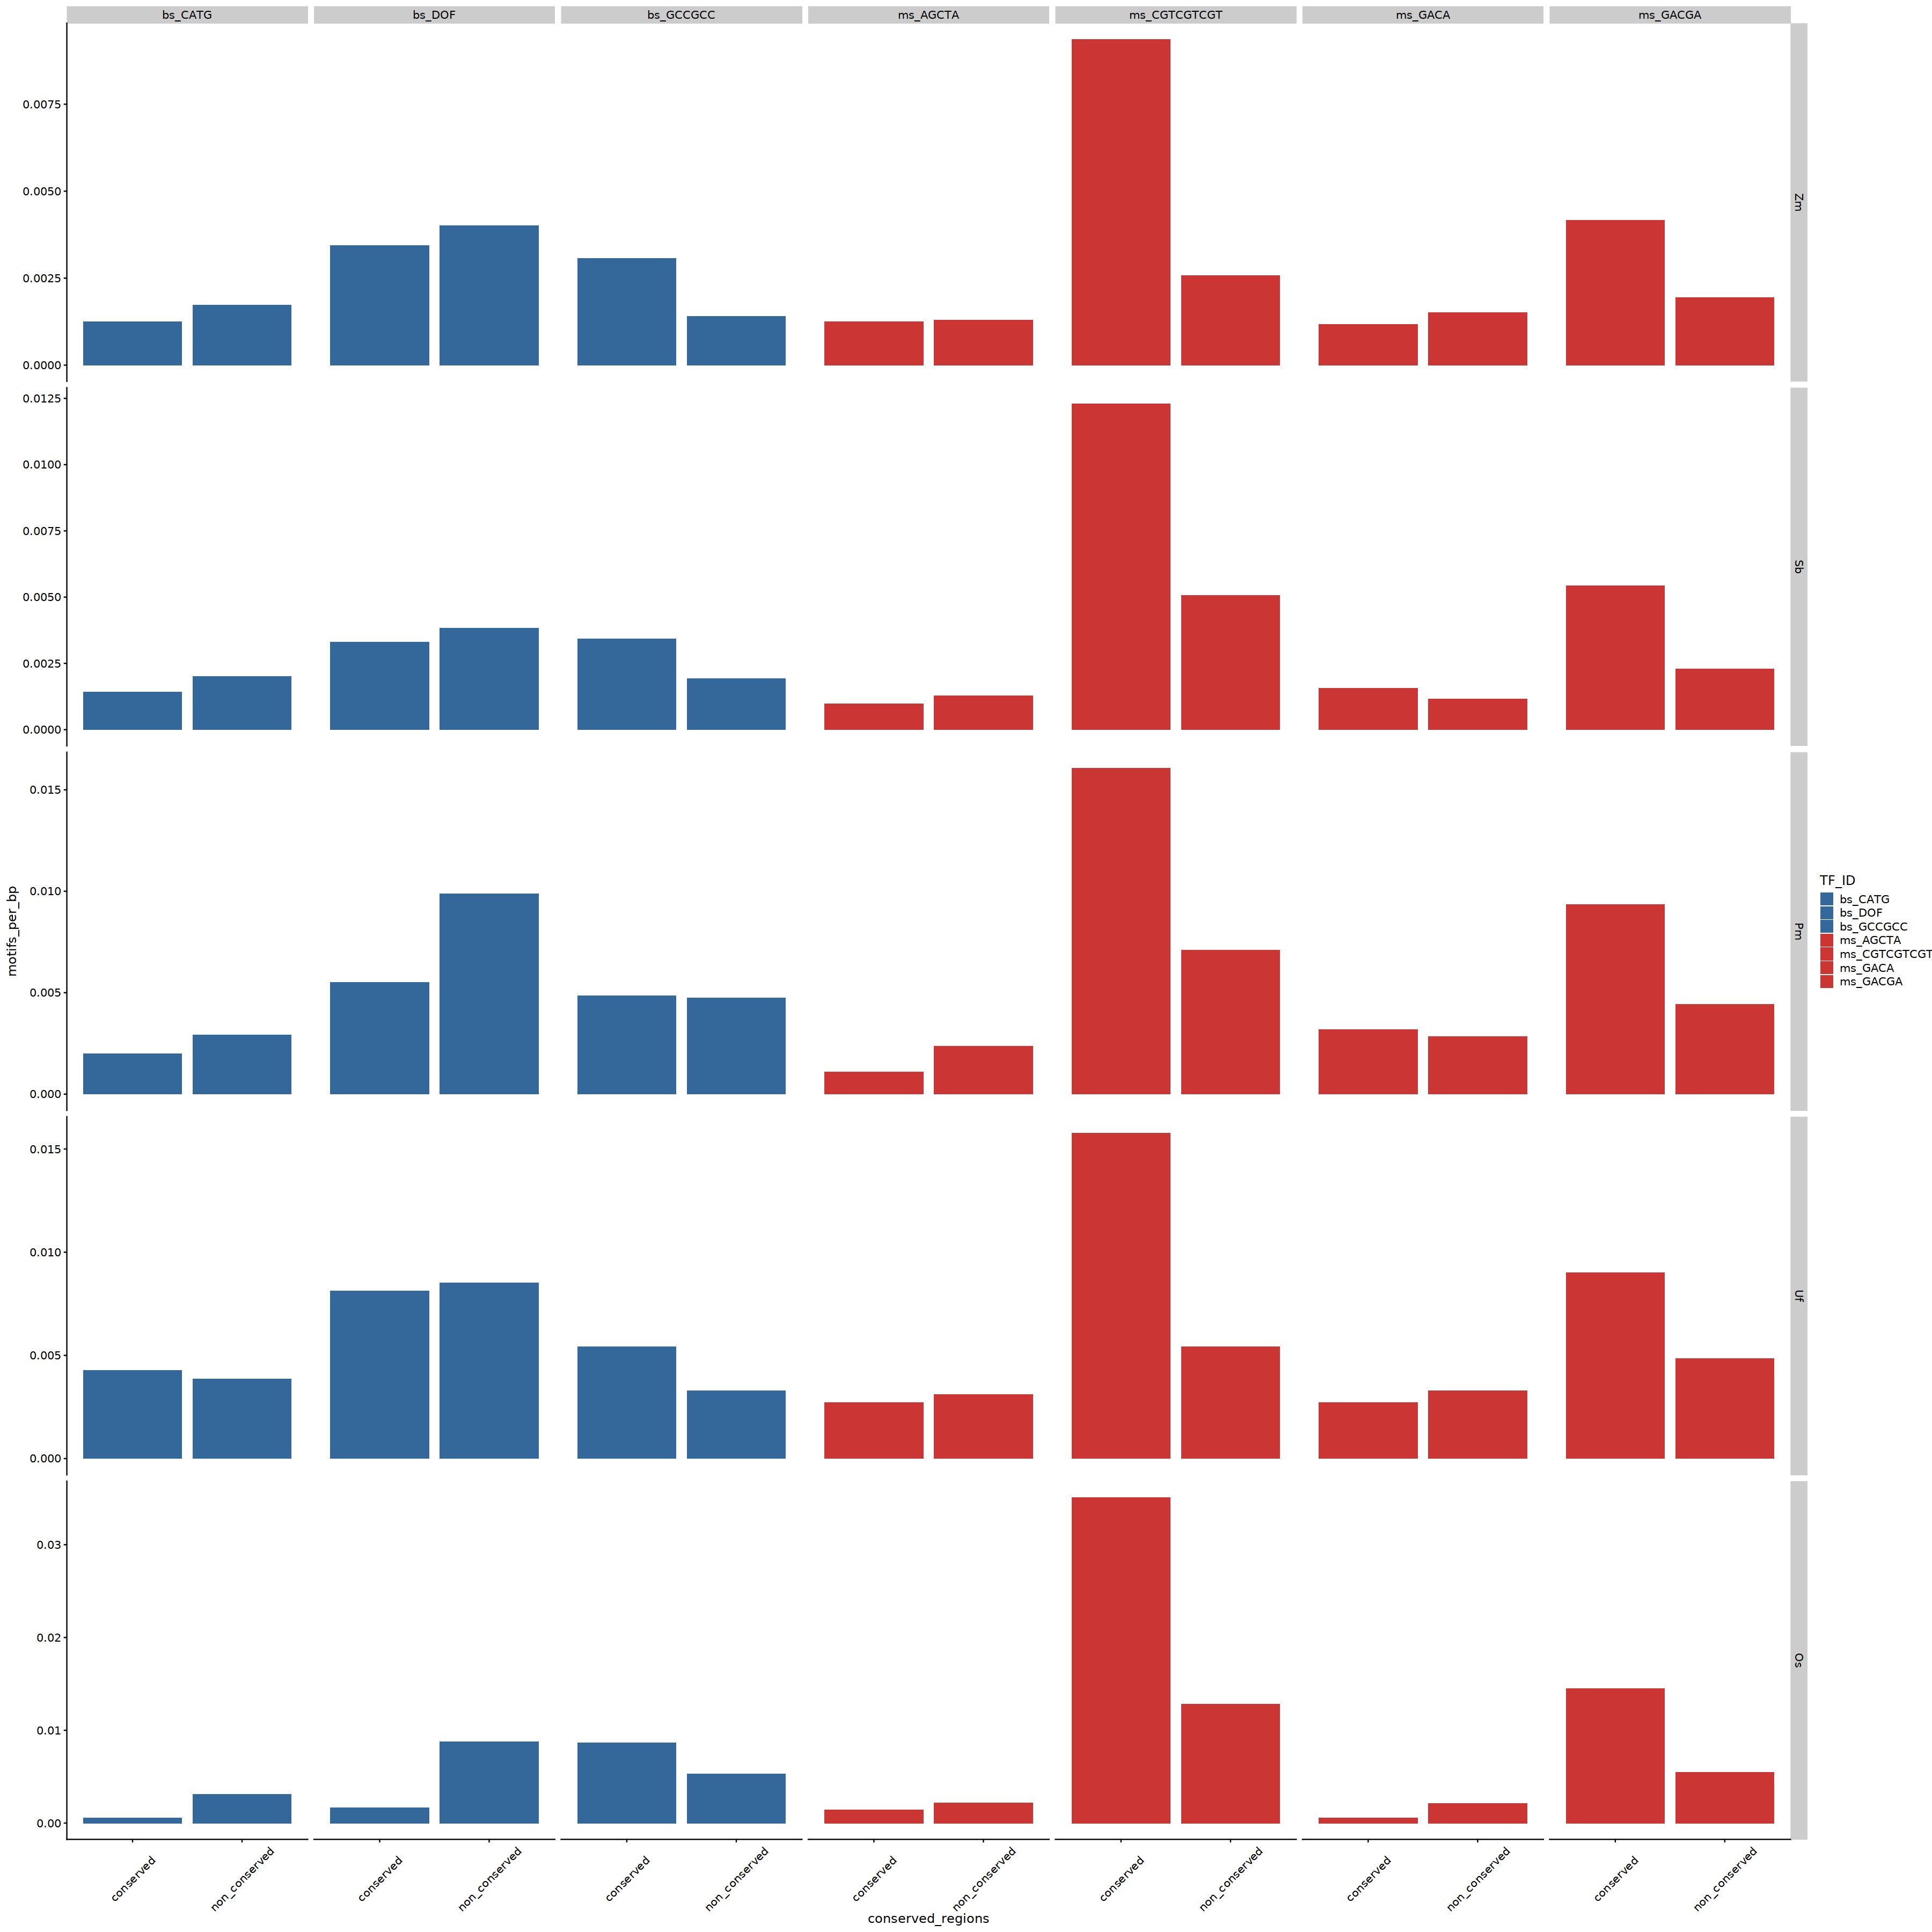

In [11]:

# colored_characters <- setNames(sapply(characters, assign_color), characters)
colored_characters <- c(
  ARF = '#8c564b',            # Brown
  AS2LOB = '#FFFFB3',         # Light Yellow
  BBRBPC = '#c11577',         # Deep Pink
  BES1 = '#6C8686',           # Slate Gray
  bHLH_TCP = '#A2A763',       # Olive Green
  C2C2_Dof = '#386CB0',       # Dark Blue
  C2C2_GATA = '#17becf',      # Cyan
  CAMTA = '#FFD92F',          # Yellow
  CPP = '#e377c2',            # Pink
  E2FDP = '#d87c6a',          # Soft Red
  "GARP_ARR-B" = '#D6EEBE',   # Light Green
  "GARP_G2-like" = '#5894D4', # Sky Blue
  HD = '#6AAD51',             # Green
  HD_PLINC = '#ffd460',       # Golden Yellow
  "HD-Zip_I_II" = '#CCCCCC',  # Light Gray
  "HD-Zip_IV" = '#DEA940',    # Orange
  HSF = '#7570B3',            # Lavender
  MADS_MIKC = '#84c5ff',      # Light Blue
  NAC = '#E7673B',            # Vermilion
  SBP = '#2ca02c',            # Dark Green
  WRKY = '#FB9A99',           # Soft Pink
  bs_DOF = '#34679A',         # Unchanged
  bs_CATG = '#34679A',        # Unchanged
  bs_GCCGCC = '#34679A',      # Unchanged
  ms_GACGA = '#CB3533',       # Unchanged
  ms_AGCTA = '#CB3533',       # Unchanged
  ms_GACA = '#CB3533',        # Unchanged
  ms_CGTCGTCGT = '#CB3533'    # Unchanged
)

options(repr.plot.width=30, repr.plot.height=30)


broad_acc_all_tf_motifs <- plotting_data %>% 
    dplyr::filter(acr_class_type == "broadly_accessible") %>% 
    mutate(species = factor(species, levels = c("Zm", "Sb", "Pm", "Uf", "Os"))) %>%
    ggplot(aes(x = conserved_regions, y = motifs_per_bp, fill = TF_ID)) +
    geom_bar(stat="identity") +
    facet_grid(species ~ TF_ID, scales = "free") +
    scale_fill_manual(values = colored_characters) + theme_cowplot() +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 



broad_acc_bs_ms_tfs <- plotting_data %>% 
    dplyr::filter(acr_class_type == "broadly_accessible") %>% 
    filter(str_starts(TF_ID, "ms_") | str_starts(TF_ID, "bs_")) %>%  # Filtering TF_IDs
    mutate(species = factor(species, levels = c("Zm", "Sb", "Pm", "Uf", "Os"))) %>%
    ggplot(aes(x = conserved_regions, y = motifs_per_bp, fill = TF_ID)) +
    geom_bar(stat="identity") +
    facet_grid(species ~ TF_ID, scales = "free") +
    scale_fill_manual(values = colored_characters) + theme_cowplot() +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 



broad_acc_bs_ms_tfs

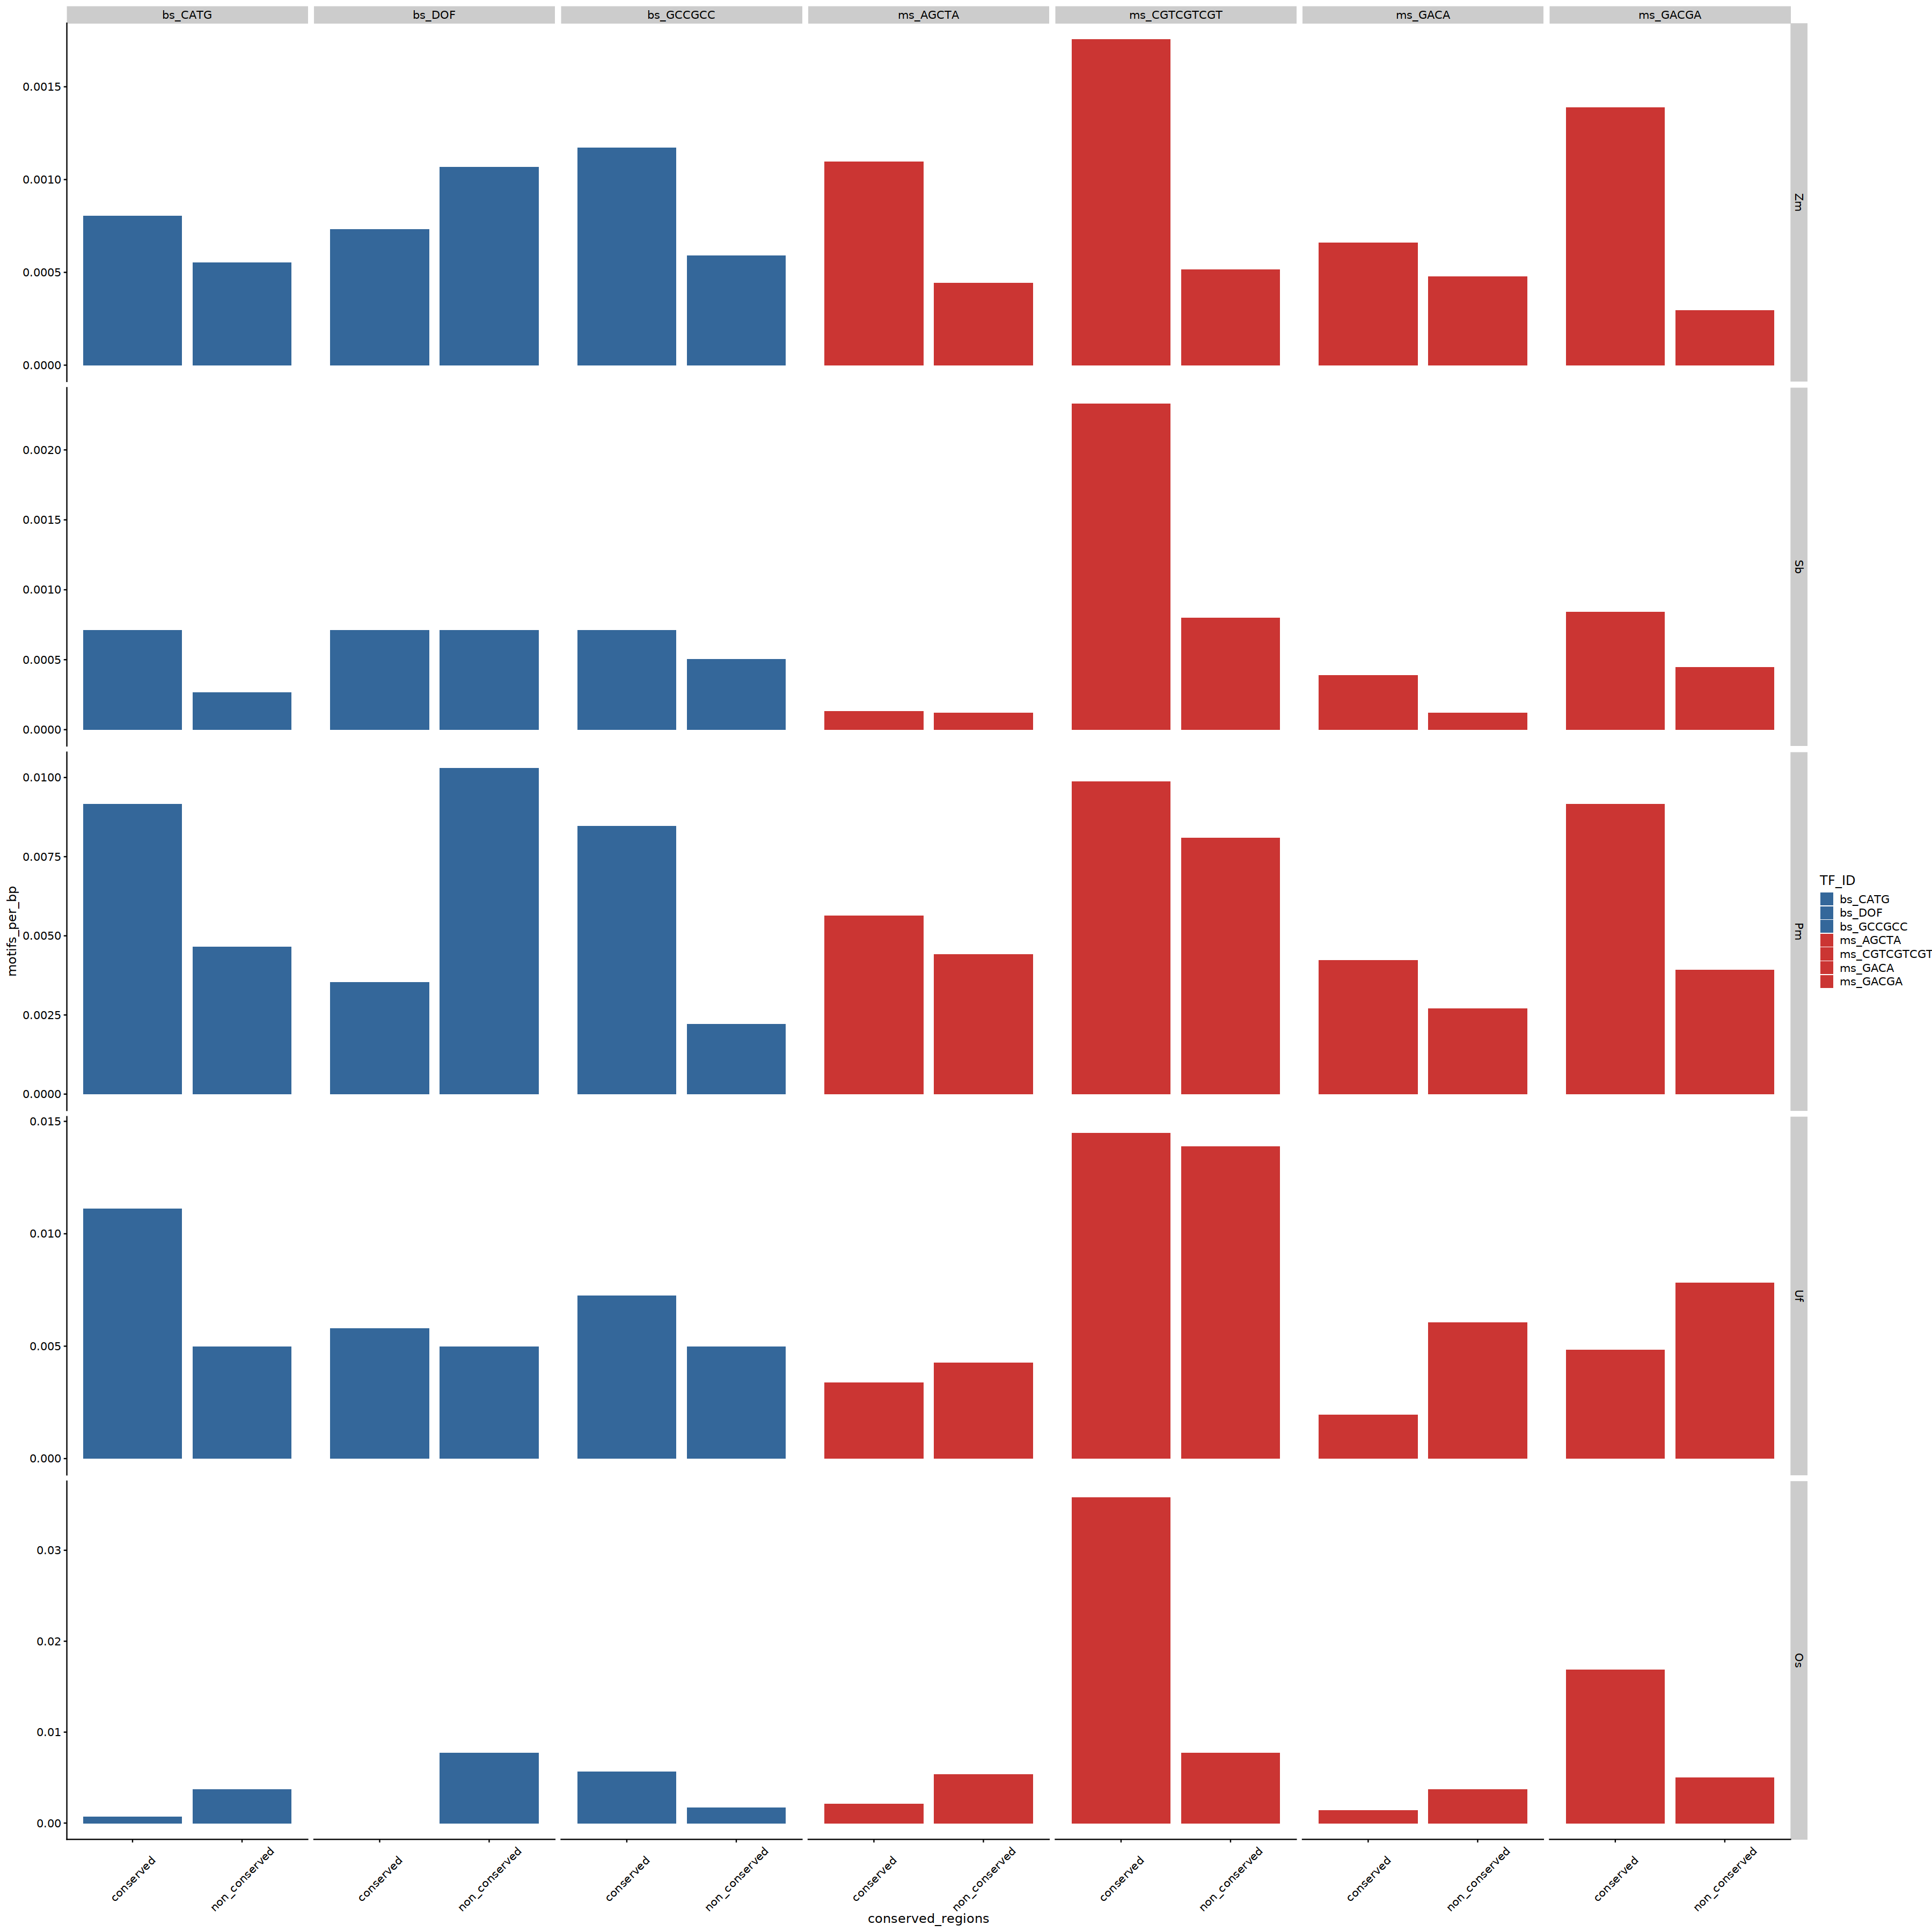

In [12]:
options(repr.plot.width=30, repr.plot.height=30)
ms_acrs_all_tfs <- plotting_data %>% 
    dplyr::filter(acr_class_type == "mesophyll") %>% 
    mutate(species = factor(species, levels = c("Zm", "Sb", "Pm", "Uf", "Os"))) %>%
    ggplot(aes(x = conserved_regions, y = motifs_per_bp, fill = TF_ID)) +
    geom_bar(stat="identity") +
    facet_grid(species ~ TF_ID, scales = "free") +
    scale_fill_manual(values = colored_characters) + theme_cowplot() +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 


ms_acrs_bs_ms_tfs <- plotting_data %>% 
    dplyr::filter(acr_class_type == "mesophyll") %>% 
    filter(str_starts(TF_ID, "ms_") | str_starts(TF_ID, "bs_")) %>%  # Filtering TF_IDs
    mutate(species = factor(species, levels = c("Zm", "Sb", "Pm", "Uf", "Os"))) %>%
    ggplot(aes(x = conserved_regions, y = motifs_per_bp, fill = TF_ID)) +
    geom_bar(stat="identity") +
    facet_grid(species ~ TF_ID, scales = "free") +
    scale_fill_manual(values = colored_characters) + theme_cowplot() +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 


ms_acrs_bs_ms_tfs

In [13]:
colnames(plotting_data)

[1] "species"           "TF_ID"             "acr_class_type"   
[4] "conserved_regions" "total_width"       "gene_family"      
[7] "TF_counts"         "motifs_per_bp"

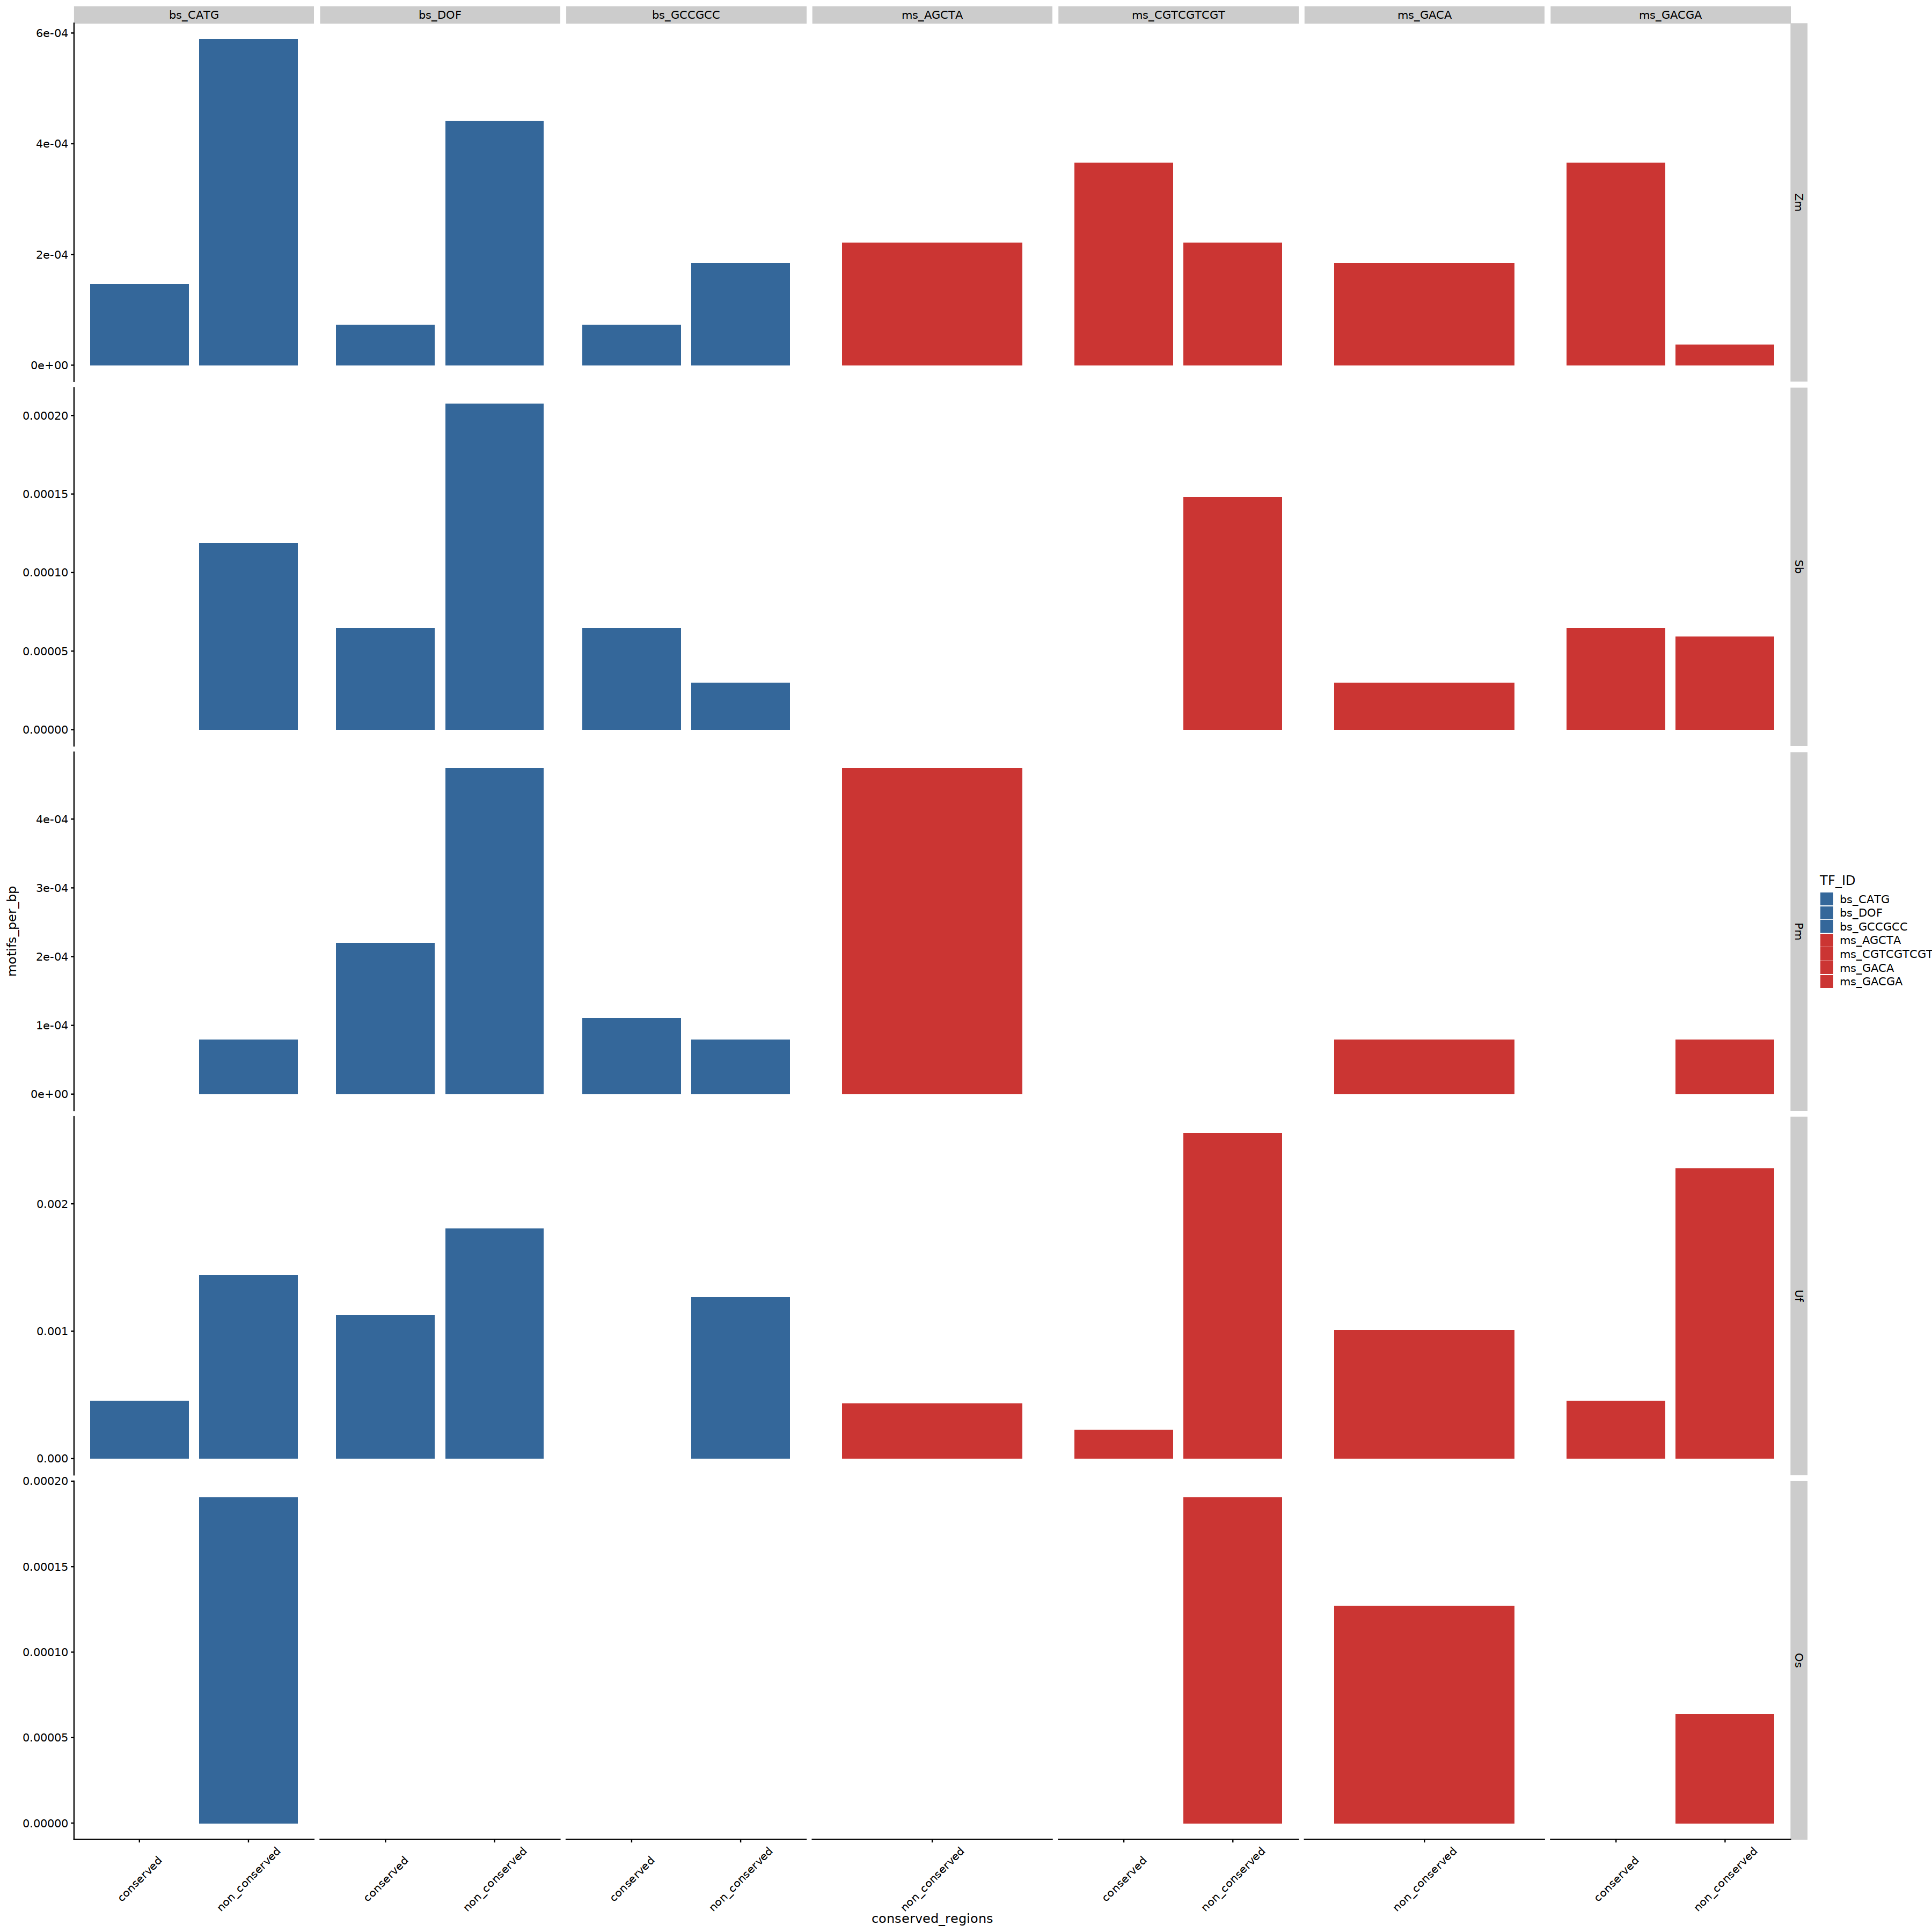

In [24]:
options(repr.plot.width=30, repr.plot.height=30)
pepc_relationship <- plotting_data %>% 
    dplyr::filter(gene_family == "PEPCK") %>% 
    filter(str_starts(TF_ID, "ms_") | str_starts(TF_ID, "bs_")) %>%  # Filtering TF_IDs

    mutate(species = factor(species, levels = c("Zm", "Sb", "Pm", "Uf", "Os"))) %>%
    ggplot(aes(x = conserved_regions, y = motifs_per_bp, fill = TF_ID)) +
    geom_bar(stat="identity") +
    facet_grid(species ~ TF_ID, scales = "free") +
    scale_fill_manual(values = colored_characters) + theme_cowplot() +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 




pepc_relationship

In [6]:
perform_chi_square <- function(subset_data) {
  # Creating a contingency table
  contingency_table <- table(subset_data$conserved_regions, subset_data$motifs_per_bp)

  # Perform Chi-square test
  test_result <- chisq.test(contingency_table)
  
  return(test_result)
}

# Group data and apply function
results <- plotting_data %>%
  group_by(species, TF_ID, acr_class_type) %>%
  do(test_result = perform_chi_square(.))


results

Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


ERROR: Error in chisq.test(contingency_table): 'x' must at least have 2 elements


In [ ]:
options(repr.plot.width=30, repr.plot.height=30)
bs_acrs_all_tfs <- plotting_data %>% 
    dplyr::filter(acr_class_type == "bundle_sheath") %>% 
    mutate(species = factor(species, levels = c("Zm", "Sb", "Pm", "Uf", "Os"))) %>%
    ggplot(aes(x = conserved_regions, y = motifs_per_bp, fill = TF_ID)) +
    geom_bar(stat="identity") +
    facet_grid(species ~ TF_ID, scales = "free") +
    scale_fill_manual(values = colored_characters) + theme_cowplot() +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 


bs_acrs_bs_ms_tfs <- plotting_data %>% 
    dplyr::filter(acr_class_type == "bundle_sheath") %>% 
    filter(str_starts(TF_ID, "ms_") | str_starts(TF_ID, "bs_")) %>%  # Filtering TF_IDs
    mutate(species = factor(species, levels = c("Zm", "Sb", "Pm", "Uf", "Os"))) %>%
    ggplot(aes(x = conserved_regions, y = motifs_per_bp, fill = TF_ID)) +
    geom_bar(stat="identity") +
    facet_grid(species ~ TF_ID, scales = "free") +
    scale_fill_manual(values = colored_characters) + theme_cowplot() +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 


bs_acrs_bs_ms_tfs

In [7]:
head(plotting_data)

species,TF_ID,acr_class_type,conserved_regions,total_width,TF_counts,motifs_per_bp
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>
Os,ARF,broadly_accessible,conserved,3590,3,0.0008356546
Os,ARF,broadly_accessible,non_conserved,15747,8,0.0005080333
Os,ARF,mesophyll,non_conserved,2996,9,0.0030040053
Os,AS2LOB,broadly_accessible,conserved,3590,27,0.0075208914
Os,AS2LOB,broadly_accessible,non_conserved,15747,40,0.0025401664
Os,AS2LOB,mesophyll,conserved,1424,15,0.0105337079


In [29]:
colnames(combined_data)

[1] "source_file"       "group"             "group_name"       
 [4] "seqnames"          "start"             "end"              
 [7] "width"             "strand"            "score"            
[10] "X1"                "X2"                "X3"               
[13] "X4"                "locus"             "species_other"    
[16] "loci"              "gene_family"       "number"           
[19] "acr_id"            "X10"               "species"          
[22] "geneID"            "enzyme_location"   "conserved_regions"
[25] "TF_ID"             "total_width"       "acr_class_type"

`summarise()` has grouped output by 'species', 'TF_ID', 'acr_class_type',
'conserved_regions', 'gene_family'. You can override using the `.groups`
argument.


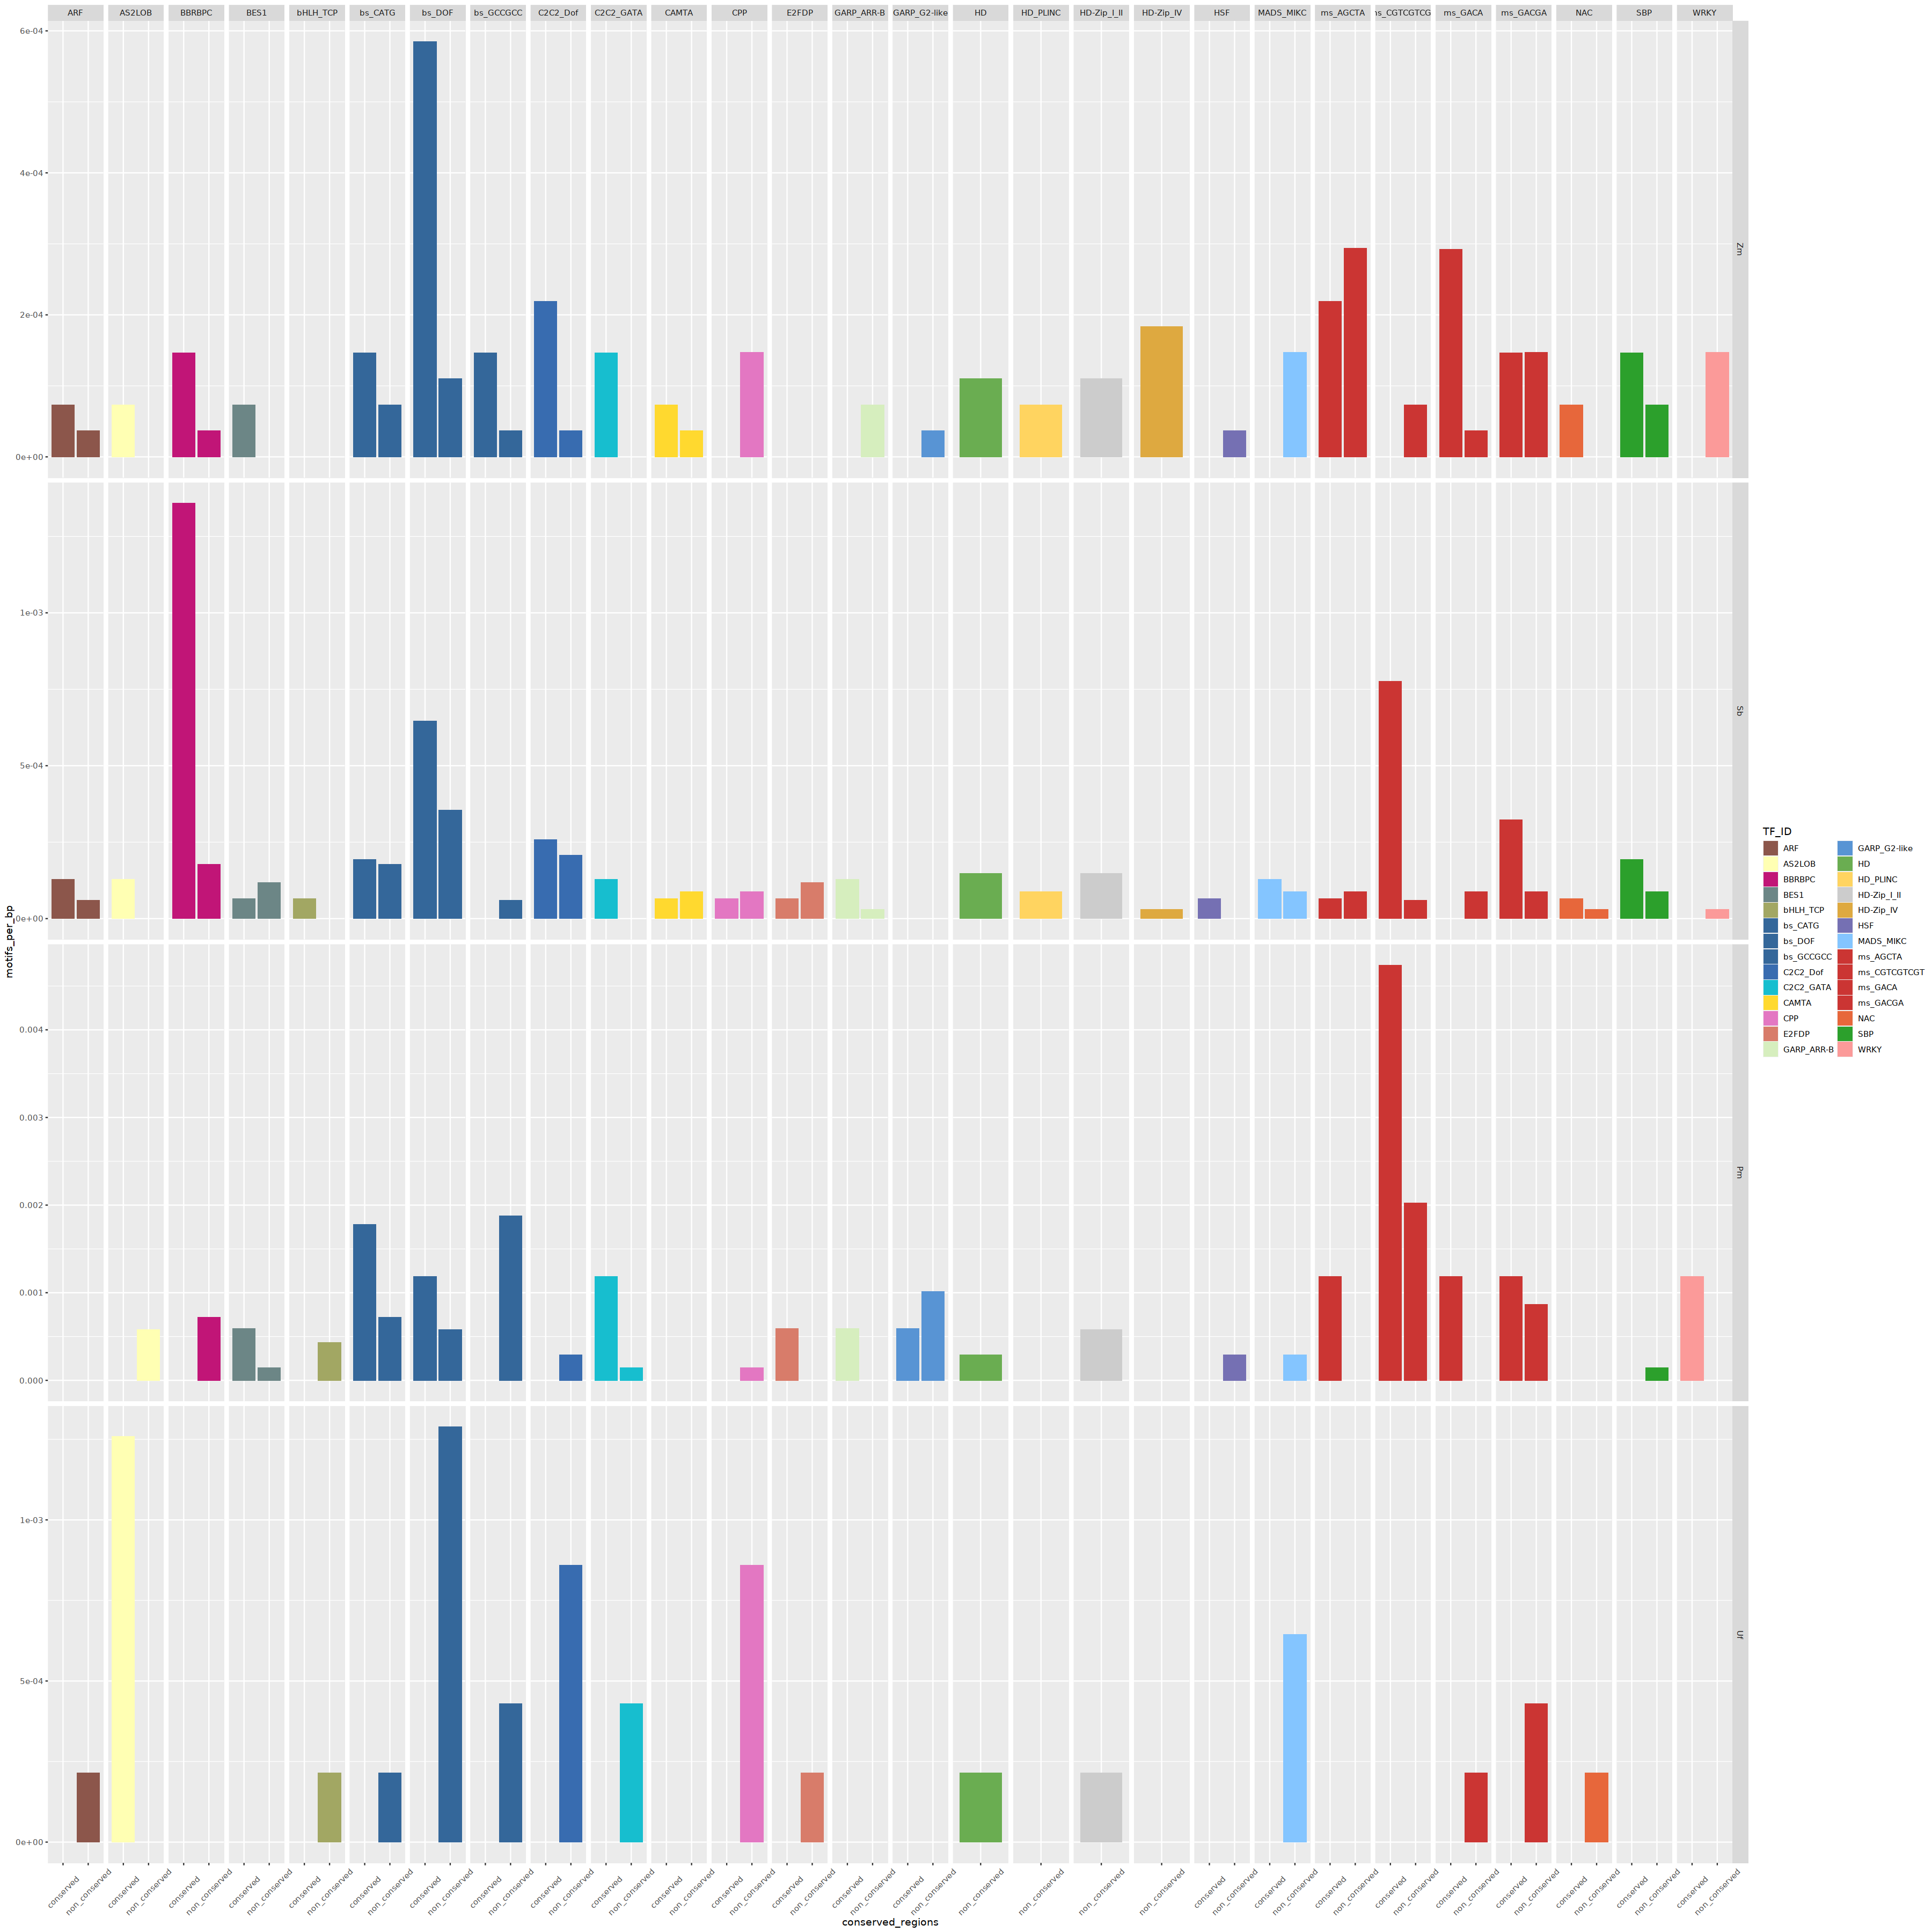

In [35]:
 
combined_data %>% 
    dplyr::group_by(species, TF_ID, acr_class_type, conserved_regions,  gene_family, total_width) %>% 
    distinct() %>% 
    summarise(TF_counts = n()) %>% 
    dplyr::mutate(motifs_per_bp = TF_counts/total_width) %>% 
    #dplyr::filter(acr_class_type == "broadly_accessible") %>% 
    dplyr::filter(gene_family %in% "NADPME") %>% 
    dplyr::filter(acr_class_type == "bundle_sheath") %>% 
    mutate(species = factor(species, levels = c("Zm", "Sb", "Pm", "Uf", "Os"))) %>%
    ggplot(aes(x = conserved_regions, y = motifs_per_bp, fill = TF_ID)) +
    geom_bar(stat="identity") +
    facet_grid(species ~ TF_ID, scales = "free") +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) +
    scale_fill_manual(values = colored_characters)


In [60]:
head(combined_data)

source_file,group,group_name,seqnames,start,end,width,strand,score,X1,⋯,number,acr_id,X10,species,geneID,enzyme_location,conserved_regions,TF_ID,total_width,acr_class_type
<chr>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,1,NA,Chr1,5905168,5905173,6,+,broadly_accessible,NA,⋯,1,scACR_1353,NA,Os,LOC_Os01g11054,mesophyll,non_conserved,ARF,15747,broadly_accessible
1,1,NA,Chr1,26198205,26198210,6,-,broadly_accessible,NA,⋯,1,scACR_4696,NA,Os,LOC_Os01g46070,mesophyll,non_conserved,ARF,15747,broadly_accessible
1,1,NA,Chr7,25492106,25492111,6,-,broadly_accessible,NA,⋯,3,scACR_53970,NA,Os,LOC_Os07g42600,mesophyll,non_conserved,ARF,15747,broadly_accessible
1,1,NA,Chr7,25498431,25498436,6,-,broadly_accessible,NA,⋯,3,scACR_53971,NA,Os,LOC_Os07g42600,mesophyll,non_conserved,ARF,15747,broadly_accessible
1,1,NA,Chr8,15592198,15592203,6,-,broadly_accessible,NA,⋯,1,scACR_56961,NA,Os,LOC_Os08g25624,mesophyll,non_conserved,ARF,15747,broadly_accessible
1,1,NA,Chr9,17576434,17576439,6,-,broadly_accessible,NA,⋯,2,scACR_61809,NA,Os,LOC_Os09g28910,mesophyll,non_conserved,ARF,15747,broadly_accessible


In [71]:
library(plyranges)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: IRanges

Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:lubridate’:

In [85]:
colnames(combined_data)

n_regions_per_class <- combined_data %>% 
    dplyr::select(seqnames, start,end, species, acr_class_type, conserved_regions,acr_id) %>% 
    as_granges(.) %>% 
    group_by(species, acr_class_type, acr_id, conserved_regions) %>% 
    reduce_ranges() %>% 
    as.data.frame() %>% 
    dplyr::group_by(species, acr_class_type, conserved_regions) %>% 
    dplyr::summarise(n_ranges = n())



[1] "source_file"       "group"             "group_name"       
 [4] "seqnames"          "start"             "end"              
 [7] "width"             "strand"            "score"            
[10] "X1"                "X2"                "X3"               
[13] "X4"                "locus"             "species_other"    
[16] "loci"              "gene_family"       "number"           
[19] "acr_id"            "X10"               "species"          
[22] "geneID"            "enzyme_location"   "conserved_regions"
[25] "TF_ID"             "total_width"       "acr_class_type"

`summarise()` has grouped output by 'species', 'acr_class_type'. You can
override using the `.groups` argument.


In [88]:
generate_statistical_test <- combined_data %>% 
    dplyr::group_by(species, TF_ID, acr_class_type, conserved_regions, total_width, acr_id) %>% 
    distinct() %>% 
    summarise(TF_counts = n())



`summarise()` has grouped output by 'species', 'TF_ID', 'acr_class_type',
'conserved_regions', 'total_width'. You can override using the `.groups`
argument.


species,TF_ID,acr_class_type,conserved_regions,total_width,acr_id,TF_counts
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>
Os,ARF,broadly_accessible,conserved,3590,scACR_11253,1
Os,ARF,broadly_accessible,conserved,3590,scACR_11254,1
Os,ARF,broadly_accessible,conserved,3590,scACR_26062,1
Os,ARF,broadly_accessible,non_conserved,15747,scACR_11257,1
Os,ARF,broadly_accessible,non_conserved,15747,scACR_1353,1
Os,ARF,broadly_accessible,non_conserved,15747,scACR_4696,1


In [94]:
test_data

species,TF_ID,acr_class_type,conserved_regions,total_width,acr_id,TF_counts
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>
Zm,ARF,broadly_accessible,conserved,13677,scACR_17188,1
Zm,ARF,broadly_accessible,conserved,13677,scACR_23836,1
Zm,ARF,broadly_accessible,conserved,13677,scACR_24801,2
Zm,ARF,broadly_accessible,conserved,13677,scACR_24802,1
Zm,ARF,broadly_accessible,conserved,13677,scACR_24806,1
Zm,ARF,broadly_accessible,conserved,13677,scACR_32475,1
Zm,ARF,broadly_accessible,conserved,13677,scACR_37443,1
Zm,ARF,broadly_accessible,conserved,13677,scACR_37446,2
Zm,ARF,broadly_accessible,conserved,13677,scACR_3874,1


In [93]:

#xt <- xtabs(~ type + acr_cell_type_specific_class, data = subsample)

test_data <- generate_statistical_test %>% 
    dplyr::filter(species == 'Zm' & TF_ID == "ARF" & acr_class_type == "broadly_accessible")


xtabs(~conserved_regions + TF_counts , data = test_data)

                 TF_counts
conserved_regions  1  2
    conserved      8  2
    non_conserved 18  4

In [ ]:
## Perform Enrichment test with 


ora_res <- list()
system.time({
    for (motif_id in unique(zm_acrs_TFs$TF_ID)) {
        subsample <- zm_acrs_TFs %>% 
            dplyr::filter(TF_ID == motif_id) # Filter for each motif_id

        xt <- xtabs(~ type + acr_cell_type_specific_class, data = subsample)

        # Replace zeros with ones in the contingency table
        xt <- apply(xt, c(1, 2), function(x) ifelse(x == 0, 1, x))
        
        print(xt[c("mesophyll", "None"), c("mesophyll", "broadly_accessible")])
        ft.ms <- fisher.test(xt[c("mesophyll", "None"), c("mesophyll", "broadly_accessible")], alternative = "greater")
        ft.bs <- fisher.test(xt[c("bundle_sheath", "None"), c("bundle_sheath", "broadly_accessible")], alternative = "greater")
        ft.bs_vs_ms <- fisher.test(xt[c("bundle_sheath", "mesophyll"), c("bundle_sheath", "mesophyll")], alternative = "greater")
        ft.ms_vs_bs <- fisher.test(xt[c("mesophyll", "bundle_sheath"), c("mesophyll", "bundle_sheath")], alternative = "greater")

        ora_res[[motif_id]] <- data.frame(
            "Motif.ID" = motif_id,
            "OR.ms" = unname(ft.ms$estimate), "pv.ms" = ft.ms$p.value,
            "OR.bs" = unname(ft.bs$estimate), "pv.bs" = ft.bs$p.value,
            "OR.bs_vs_ms" = unname(ft.bs_vs_ms$estimate), "pv.bs_vs_ms" = ft.bs_vs_ms$p.value,
            "OR.ms_vs_bs" = unname(ft.ms_vs_bs$estimate), "pv.ms_vs_bs" = ft.ms_vs_bs$p.value
        )
    }
})


ora_res <- as.data.frame(do.call("rbind",ora_res))
rownames(ora_res) <- NULL

# adjust p-values for multiple testing
ora_res$fdr.bs <- p.adjust(ora_res$pv.bs, method="BH")
ora_res$fdr.ms   <- p.adjust(ora_res$pv.ms, method="BH") 
ora_res$fdr.bs_vs_ms   <- p.adjust(ora_res$pv.bs_vs_ms, method="BH") 
ora_res$fdr.ms_vs_bs   <- p.adjust(ora_res$pv.ms_vs_bs, method="BH") 

